<a href="https://colab.research.google.com/github/s331440/DAVE3625/blob/main/4030_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# machine learning libraries
import tensorflow as tf #2.8.2
from tensorflow import keras #2.8.0
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from keras import Sequential
from keras.callbacks import TensorBoard
from keras.layers import Input
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv3D, Deconv3D
from keras.layers.core import Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Reshape,Flatten,Conv3D,Conv3DTranspose,LeakyReLU,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.python import metrics
from tensorflow.keras.metrics import binary_crossentropy

from tensorflow.keras import layers

# math libraries
import numpy as np

# visualization
from matplotlib import pyplot as plt
import scipy.io as io
import scipy.ndimage as nd
import glob
import os
import time

# sys and helpers
import sys
import os
import glob
from tqdm import tqdm
from datetime import datetime

In [ ]:
import numpy as np
data = np.load("/content/modelnet10.npz", allow_pickle=True) #loading the dataset
train_voxel = data["train_voxel"] # Training 3D voxel samples
train_labels = data["train_labels"] # Training labels (integers from 0 to 9)
class_map = data["class_map"] # Dictionary mapping the labels to their class names.

In [ ]:
opt = Adam(learning_rate=0.0002,beta_1 = 0.5) #setting learning rate

In [ ]:
#creating the discriminator model
def define_discriminator(in_shape=(64,64,64,1)):
  print('inside discriminator')
  model = Sequential()
  model.add(Conv3D(64,(4,4,4), strides=(2,2,2), padding ='same', input_shape = in_shape))
  model.add(LeakyReLU(alpha= 0.00001))
  model.add(BatchNormalization(center=True, scale=True))
  

  model.add(Conv3D(64,(4,4,4), strides=(2,2,2), padding ='same'))
  model.add(LeakyReLU(alpha= 0.00001))
  model.add(BatchNormalization(center=True, scale=True))
  

  model.add(Conv3D(128,(4,4,4), strides=(2,2,2), padding ='same'))
  model.add(LeakyReLU(alpha= 0.00001))
  model.add(BatchNormalization(center=True, scale=True))
  

  model.add(Conv3D(256,(4,4,4), strides=(2,2,2), padding ='same'))
  model.add(LeakyReLU(alpha= 0.00001))
  model.add(BatchNormalization(center=True, scale=True))
  

  model.add(Conv3D(512,(4,4,4), strides=(2,2,2), padding ='same'))
  model.add(LeakyReLU(alpha= 0.00001))
  model.add(BatchNormalization(center=True, scale=True))

  model.add(Conv3D(512,(4,4,4), strides=(2,2,2), padding ='same'))
  model.add(LeakyReLU(alpha= 0.00001))
  model.add(BatchNormalization(center=True, scale=True))

  model.add(Flatten())
  model.add(Dropout(0.4))
  ##assert model.output_shape == (None,4096)
  model.add(Dense(64,activation='sigmoid'))
  model.add(Dense(1,activation='sigmoid'))
  #model.add(Reshape(32,32,32))
  model.compile(loss=binary_crossentropy,optimizer=opt, metrics=['accuracy'])
  return model

In [ ]:
test_discr = define_discriminator()
print(test_discr.summary()) #getting information about discriminator model, including how many parameters

inside discriminator
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 32, 32, 32, 64)    4160      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32, 64)    0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32, 64)   256       
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 16, 16, 16, 64)    262208    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 16, 64)    0         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 16, 64)   256       
 hNormalization)                   

In [ ]:
inputs = keras.Input(shape=(784,), name="digits")
x1 = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x2 = layers.Dense(64, activation="relu", name="dense_2")(x1)
outputs = layers.Dense(10, name="predictions")(x2)

In [ ]:
# building the generator
def define_generator(latent_dim):
  model = Sequential()
  n_nodes = 128*1*1*1
  model.add(Dense(n_nodes,input_dim = latent_dim))
  
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((1,1,1,128)))
  model.add(Conv3DTranspose(512,(4,4,4), strides=(1,1,1),padding='valid'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv3DTranspose(256,(4,4,4), strides=(2,2,2),padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv3DTranspose(128,(4,4,4), strides=(2,2,2),padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv3DTranspose(128,(4,4,4), strides=(2,2,2),padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv3DTranspose(64,(4,4,4), strides=(2,2,2),padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv3D(1,(8,8,8),activation = 'sigmoid',padding = 'same'))
  
  return model

In [ ]:
test_gen = define_generator(200)

print(test_gen.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               25728     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 reshape (Reshape)           (None, 1, 1, 1, 128)      0         
                                                                 
 conv3d_transpose (Conv3DTra  (None, 4, 4, 4, 512)     4194816   
 nspose)                                                         
                                                                 
 batch_normalization_6 (Batc  (None, 4, 4, 4, 512)     2048      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 4, 4, 4, 512)     

In [ ]:
def generate_latent_points(latent_dim,n_samples):
  X_input = np.random.randn(latent_dim * n_samples)
  X_input = X_input.reshape(n_samples,latent_dim)
  return X_input

latent_dim = 200
n_samples = 10

X_out = generate_latent_points(latent_dim,n_samples)
print(X_out)

[[ 0.09718451 -1.20616586  0.03161606 ...  0.6177538  -1.34729071
  -0.00200198]
 [-0.43655426  0.44203416 -1.06049642 ...  0.10499804  0.04467096
   0.18158986]
 [-1.24295131 -0.56674516 -0.15198934 ...  1.61583815  0.91530574
   0.51616464]
 ...
 [-0.00324121 -0.8741347   0.04658458 ...  0.40076902 -1.80082929
  -0.85430471]
 [-1.68749674  0.78395494 -0.29057423 ...  0.88077133  0.5319116
   0.45534008]
 [ 0.08242824 -0.84525518  0.23976846 ...  0.00666077 -0.18916416
   1.0415955 ]]


In [ ]:
def define_gan(generator,discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  opt = Adam(learning_rate = 0.0025,beta_1 = 0.5)
  model.compile(loss='binary_crossentropy',optimizer = opt)
  return model

In [ ]:
def get_real_samples(train_voxel,n_samples):
  #choose random images
  ix = np.random.randint(0,train_voxel.shape[0],n_samples)
  X = train_voxel[ix]
  #assigning 1 to y indicating real images
  y = np.ones((n_samples,1))
  return X,y

In [ ]:
def generate_fake_Samples(generator,latent_dim,n_samples):
  #generate points in latent space
  x_input = generate_latent_points(latent_dim,n_samples)
  #predict using generator to generate fake samples
  X = generator.predict(x_input)
  # labeled as 0 since they are fake samples
  y = np.zeros((n_samples,1))
  return X,y

In [ ]:
# loss values for further plotting

D_L_LOSS = []
G_L_LOSS = []

In [ ]:
def train(g_model, d_model,gan_model,train_voxel,latent_dim,n_epochs = 3, n_batch= 10):
  bat_per_epo = int(train_voxel.shape[0] / n_batch)
  half_batch = int(n_batch / 2)

  #training loop
  for i in range(n_epochs):
    for j in range(n_batch):
      
      X_real,y_real = get_real_samples(train_voxel,half_batch)
      #measuring loss of discriminator
      d_loss_real,_ = d_model.train_on_batch(X_real,y_real) 

      #generate fake samples
      X_fake,y_fake = generate_fake_Samples(g_model,latent_dim,half_batch)
      d_loss_fake,_ = d_model.train_on_batch(X_fake,y_fake)

      #d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      #prepare latent points as input to the generator
      X_gan = generate_latent_points(latent_dim,n_batch)

      #generated samples are labeled as valid to fool the discriminator
      y_gan = np.ones((n_batch,1))

      #train generator with latent_dim and y as 1
      g_loss = gan_model.train_on_batch(X_gan,y_gan)

      print('Epoch>%d, Batch %d/%d,d1=%.3f,d2=%.3f,g=%.3f' %
            (i+1,j+1,bat_per_epo,d_loss_real,d_loss_fake,g_loss))
      
      #this was used to try to show the history of the loss discriminator and generator
      #train generator


      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
      noise = np.random.normal(0, 1, (n_batch, 100))

      # the generator wants the discriminator to label the generated samples
      # as valid (ones)
      valid_y = np.array([1] * 32)

      # Plot the progress
      print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (n_epochs, d_loss_real, d_loss_fake, g_loss))
            
      D_L_LOSS.append(d_loss_real)
      G_L_LOSS.append(g_loss)
     



In [ ]:
#train the gan
#size of latent space
latent_dim = 200
#create the discriminator
discriminator = define_discriminator()
#create the generator
generator = define_generator(latent_dim)
#create gan
gan_model = define_gan(generator,discriminator)
#train model
train(generator,discriminator,gan_model,train_voxel,latent_dim,n_epochs=3)

inside discriminator
Epoch>1, Batch 1/399,d1=1.241,d2=0.343,g=1.221
3 [D loss: 1.240758, acc.: 0.34%] [G loss: 1.221093]
Epoch>1, Batch 2/399,d1=1.357,d2=0.341,g=1.212
3 [D loss: 1.357080, acc.: 0.34%] [G loss: 1.211762]
Epoch>1, Batch 3/399,d1=1.228,d2=0.321,g=1.207
3 [D loss: 1.227969, acc.: 0.32%] [G loss: 1.206811]
Epoch>1, Batch 4/399,d1=1.232,d2=0.356,g=1.199
3 [D loss: 1.232350, acc.: 0.36%] [G loss: 1.198918]
Epoch>1, Batch 5/399,d1=1.301,d2=0.342,g=1.194
3 [D loss: 1.300648, acc.: 0.34%] [G loss: 1.193813]
Epoch>1, Batch 6/399,d1=1.165,d2=0.429,g=1.185
3 [D loss: 1.165474, acc.: 0.43%] [G loss: 1.184531]
Epoch>1, Batch 7/399,d1=1.228,d2=0.365,g=1.179
3 [D loss: 1.227885, acc.: 0.36%] [G loss: 1.178739]
Epoch>1, Batch 8/399,d1=1.225,d2=0.329,g=1.171
3 [D loss: 1.224888, acc.: 0.33%] [G loss: 1.170938]
Epoch>1, Batch 9/399,d1=1.266,d2=0.341,g=1.153
3 [D loss: 1.266047, acc.: 0.34%] [G loss: 1.153368]
Epoch>1, Batch 10/399,d1=1.180,d2=0.347,g=1.147
3 [D loss: 1.179721, acc.: 0.35

In [ ]:
for i in range(len(test_gen)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(test_gen[label.numpy()[0]])
        plt.axis('off')

TypeError: ignored

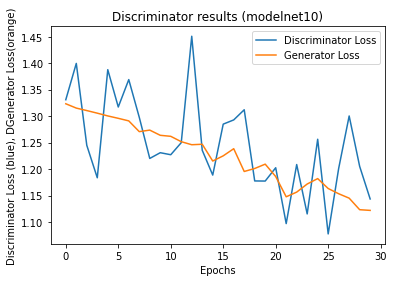

In [ ]:

# loss values for further plotting
D_L_REAL = []
D_L_FAKE = []
D_L = []
D_ACC = []
G_L = []

plt.plot(D_L_LOSS)
plt.plot(G_L_LOSS)
plt.title('Discriminator results (modelnet10)')
plt.xlabel('Epochs')
plt.ylabel('Discriminator Loss (blue), DGenerator Loss(orange)')
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()